In [1]:
# import the required packages

import numpy as np
import lightcones.linalg as la
from lightcones.solvers.schrodinger import solve
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True


Let us construct the retarded light cone density matrix

$$
\widehat{\rho}_{+}\left(t\right)=\intop_{0}^{t}d\tau\left|\alpha\left(\tau\right)\right\rangle \left\langle \alpha\left(\tau\right)\right|
$$

Here $\left|\alpha\left(\tau\right)\right\rangle$ describe the spread of the interaction operator:

$$
\widehat{a}_{0}\left(t\right)=\sum_{k=1}^{\infty}\alpha_{k}\left(t\right)\widehat{a}_{k}
$$

$\left|\alpha\left(\tau\right)\right\rangle$ satisfy the initial value problem:

$$
i\partial_{t}\alpha_{k}\left(t\right)=\varepsilon_{k}\alpha_{k}\left(t\right)+h_{k}\alpha_{k+1}\left(t\right)+h_{k-1}\alpha_{k-1}\left(t\right),
$$

with initial condition $\alpha_{k}\left(0\right)=\delta_{k0}$.

Let us compute the grid of $\left|\alpha\left(\tau\right)\right\rangle$ for a range of times and chain sites:

In [2]:
n_sites = 200
# on-site energies
es = [1]*n_sites
# hoppings
hs = [0.05]*(n_sites-1)
H = la.tridiag(es, hs)

tmax = 1600
dt = 0.01
t = np.arange(start = 0, stop = tmax, step = dt)
nt = t.size

phi_0 = np.zeros(n_sites, dtype = complex)
phi_0[0] = 1 # initially quantum is on the site 0

phi_lc = np.zeros((n_sites, nt), dtype = np.cdouble) # Here we store the propagated orbitals

def apply_h(ti, phi_in, phi_out):
    la.mv(H, phi_in, phi_out, cout=1)

def eval_o(ti, phi):
    phi_lc[:, ti] = phi
    
solve(0, nt-1, dt, apply_h, phi_0, eval_o = eval_o)

Here we compute the integral

$$
\widehat{\rho}_{+}\left(t\right)=\intop_{0}^{t}d\tau\left|\alpha\left(\tau\right)\right\rangle \left\langle \alpha\left(\tau\right)\right|
$$

In [3]:
rho_lc = np.zeros((n_sites, n_sites), dtype = np.cdouble)

for i in range(0, nt):
    phi = la.as_column_vector(phi_lc[:, i])
    rho_lc += la.dyad(phi, phi) * dt

# for numerical stability, 
# it turns out necessary to explicity make it hermitean
# otherwise machine espilons will accumulate and break the hermicity
la.make_hermitean(rho_lc)

Let us visualize the matrix elements of $\widehat{\rho}_{+}$

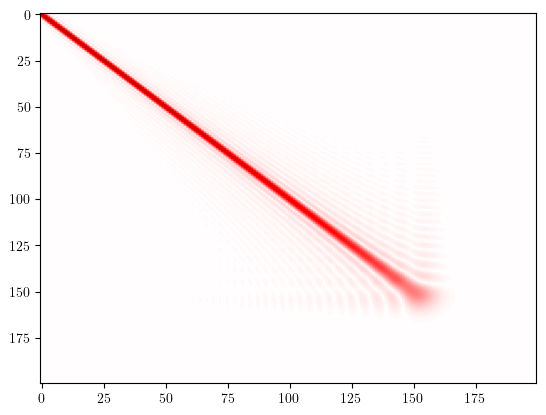

<Figure size 640x480 with 0 Axes>

In [4]:
max_ = np.max(np.abs(rho_lc))
plt.imshow(abs(rho_lc), aspect='auto', cmap = 'seismic', vmin = - max_, vmax = max_)
plt.show()
plt.savefig('rho_lightcone_retarded.eps', format = 'eps')

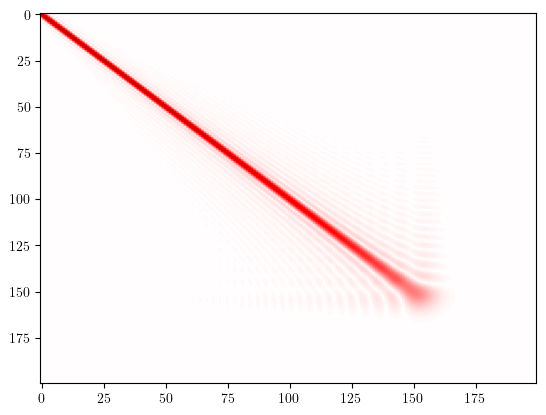

<Figure size 640x480 with 0 Axes>

In [5]:
# observe that we have utility functions in order to quickly compute rho_lc:

import lightcones
alpha = lightcones.spread(es, hs, nt, dt) 
rho_plus = lightcones.rho_plus(alpha, dt)

# plot once more
max_ = np.max(np.abs(rho_plus))
plt.imshow(abs(rho_plus), aspect='auto', cmap = 'seismic', vmin = - max_, vmax = max_)
plt.show()
plt.savefig('rho_lightcone_retarded.eps', format = 'eps')

<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_17.jpg" width="480" title="">
</div>
<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_18.jpg" width="480" title="">
</div>
<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_19.jpg" width="480" title="">
</div>
<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_20.jpg" width="480" title="">
</div>
<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_21.jpg" width="480" title="">
</div>
<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_22.jpg" width="480" title="">
</div>
<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_23.jpg" width="480" title="">
</div>
<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_24.jpg" width="480" title="">
</div>
<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_25.jpg" width="480" title="">
</div>
<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_26.jpg" width="480" title="">
</div>
<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_27.jpg" width="480" title="">
</div>

Let us find the light cone interior normal modes:

In [8]:
pi, U_rel = la.find_largest_eigs(rho_lc)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


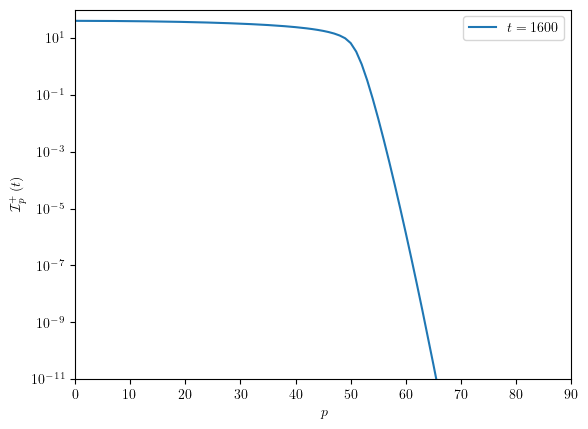

In [11]:
# Plot of eigenvalues at final time

plt.plot(np.array(range(len(pi))), pi, label="$t=" + str(tmax) + "$")
plt.ylim(10**(-11), 100)
plt.xlim(0,90)
plt.yscale('log')
plt.xlabel(r"$p$")
plt.ylabel(r"$\mathcal{I}_{p}^{+}\left(t\right)$")
plt.legend()
plt.savefig('m_tmax.eps', format='eps')

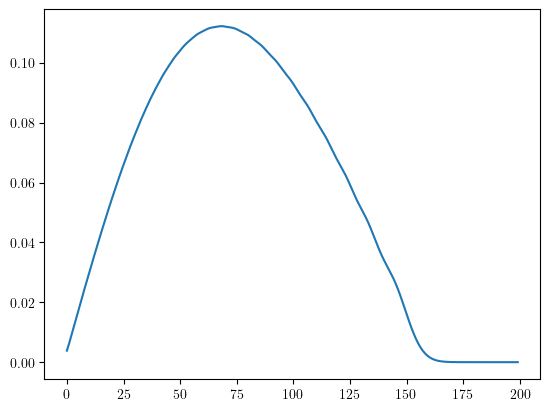

In [14]:
# Plot a few the most significant normal modes:
x = np.array(range(n_sites))
plt.plot(x, np.abs(U_rel[:, 0]))


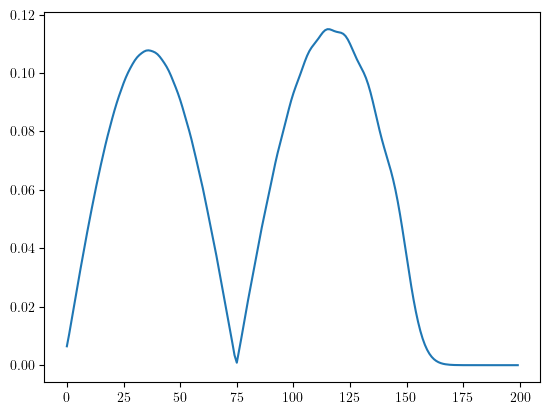

In [15]:
plt.plot(x, np.abs(U_rel[:, 1]))

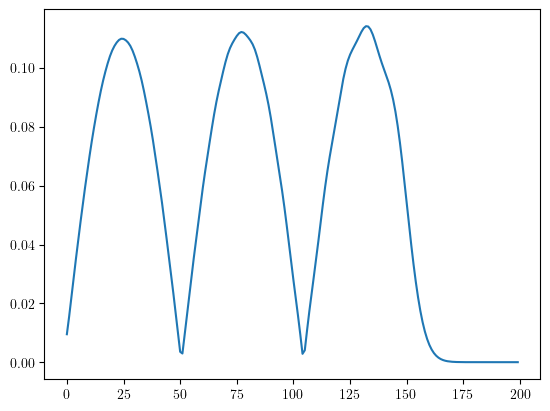

In [16]:
plt.plot(x, np.abs(U_rel[:, 2]))

We see that the light cone interior normal modes qualitatively look like standing waves of the string of a finite length $L$. The length of the string $L$ is the spatial size of the light cone interior.

Now let us investigate how the eigenvalues of $\widehat{\rho}_{+}\left(t\right)$ depend on the time:

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


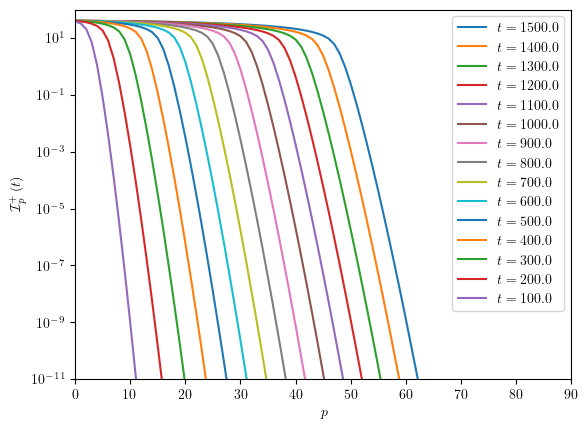

In [25]:
plt.rcParams['text.usetex'] = True

rho_lc_ = np.copy(rho_lc)

for i in range(nt-1, 0, -1):
    phi = la.as_column_vector(phi_lc[:, i])
    rho_lc_ -= la.dyad(phi, phi) * dt

    if i % 10000 == 0:
        la.make_hermitean(rho_lc_)
        pi, U_rel = la.find_largest_eigs(rho_lc_)
        plt.plot(np.array(range(len(pi))), pi, label="$t=" + str(t[i]) + "$")
        plt.ylim(10**(-11), 100)
        plt.xlim(0,90)
        plt.yscale('log')

plt.xlabel(r"$p$")
plt.ylabel(r"$\mathcal{I}_{p}^{+}\left(t\right)$")

plt.legend()
plt.savefig('m_vs_time.eps', format='eps')

We see the behaviour which is analogous to the Lieb-Robinson bounds: 
$$
\mathcal{I}_{p}^{+}\left(t\right)\leq\mathcal{I}_{1}^{+}\left(\infty\right)\exp\left(-\gamma\theta\left(p-Bt\right)\right)
$$

That is, the longer is the time $t$, the more eigenvalues $Bt$ are of the order of $\mathcal{I}_{1}^{+}\left(\infty\right)$. Subsequent eigenvalues decay at least exponentially fast.